In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

Logarithmus des Dampfdruckes gegen reziproke absolute Temperatur:

\begin{tabular}{c c c}
\toprule
{} &         Wert &     Fehler \\
\midrule
Steigung m        & -3224612.412 &  54545.402 \\
Achsenabschnitt b &       11.441 &      0.166 \\
\bottomrule
\end{tabular}

L = (26810919.357 +- 453515.706)


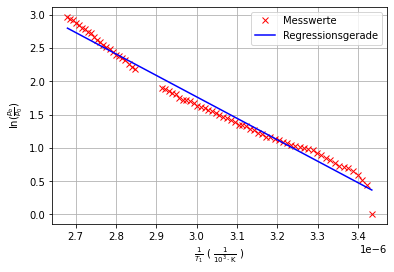

In [106]:
md_1bar = pd.read_csv('tables/md_1bar.csv')
np.savetxt('tables/pb.txt', md_1bar.values, header='p_b(Pa) T1(K)', fmt='%.0f')
pb, T = np.genfromtxt('tables/pb.txt', unpack=True, skip_header=1)

pb *= 100000
T += 273.15 
T *= 1000     
rT = 1/T        # reziproke absolute Temperaturen
p0 = pb[0]      # 
xx = rT
yy = np.log((pb/p0))
plt.plot(xx, yy, 'xr', label = 'Messwerte')

# Nicht-lineare Ausgleichsfunktion
def g(x, a, b):
    return a * x + b

para, pcov = curve_fit(g, rT, yy)
pcov = np.sqrt(np.diag(pcov))
para = np.round(para, 3)
pcov = np.round(pcov, 3)
a, b = para
fa, fb = pcov  
R = 8.314462618

dreg = {'Wert': para, 'Fehler': pcov}
dfreg = pd.DataFrame(data = dreg, index = ['Steigung m', 'Achsenabschnitt b'])
print(dfreg.to_latex(index = True, column_format= "c c c"))
plt.plot(rT, g(rT, a, b), '-b', label = 'Regressionsgerade')

plt.xlabel(r'$\frac{1}{T_{1}}$ ( $\frac{1}{10^3 \cdot\mathrm{K}}$ )')
plt.ylabel(r'ln($\frac{p_{b}}{p_{0}}$)')
plt.legend(loc="best")
plt.grid(True)

ba = -a*R
bfa =  fa*R 
L = ba
print('L = (%.3f +- %.3f)' % (ba, bfa))